In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data['Gender']=data['Gender'].map({'Male':0,'Female':1})

In [6]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


Text(0, 0.5, 'annual inciome')

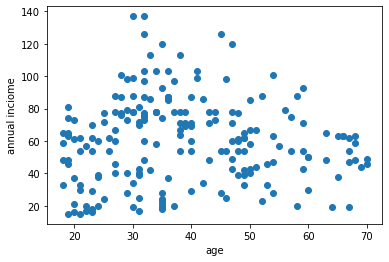

In [7]:
plt.scatter(data['Age'], data['Annual Income (k$)'])
plt.xlabel('age')
plt.ylabel('annual inciome')

In [8]:
scaler=MinMaxScaler()
data = scaler.fit_transform(data)


In [9]:
sse=[]
for k in range(1, len(data)):
    km= KMeans(n_clusters= k)
    km.fit(data)
    sse.append(km.inertia_)

C:\Users\palla\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


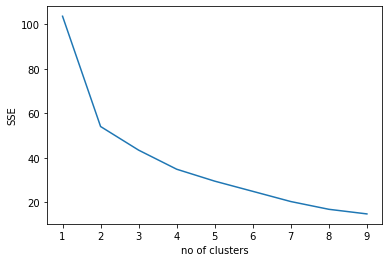

In [10]:
plt.xlabel('no of clusters')
plt.ylabel('SSE')
plt.plot(range(1,10),sse[:9])

In [12]:
km_model = KMeans(n_clusters=2)
prediction = km_model.fit_predict(data)


In [13]:
km_model.cluster_centers_

array([[ 5.18787117e-01, -4.44089210e-16,  4.19361888e-01,
         3.87108793e-01,  4.84809833e-01],
       [ 4.85238693e-01,  1.00000000e+00,  3.86504121e-01,
         3.62704918e-01,  5.15579446e-01]])

In [15]:
data['clusters']= prediction
data

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [16]:
df1= data[data['clusters']==0]
df2= data[data['clusters']==1]
df3= data[data['clusters']==2]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [17]:
plt.scatter(df1['Age'], df1['Annual Income (k$)'], color='red')
plt.scatter(df2['Age'], df2['Annual Income (k$)'], color='green')
plt.scatter(df3['Age'], df3['Annual Income (k$)'], color='yellow')
plt.xlabel('Age')
plt.ylabel('Income($)')

centers = km_model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], marker='*', color= 'black')

NameError: name 'df1' is not defined